In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import models.evaluate_models
from models.train_model import *
from models.evaluate_models import print_metrics
from preprocessing.preprocessing import *
import importlib
import models.train_model
import models.evaluate_models
import config_module.config
import config_module.config 
import preprocessing.preprocessing
importlib.reload(models.train_model) 
importlib.reload(models.evaluate_models) 
importlib.reload(preprocessing.preprocessing)
importlib.reload(config_module.config)

<module 'config_module.config' from 'c:\\Users\\Danny Phong\\Documents\\PROJECT\\WebVulnerabilities\\config_module\\config.py'>

In [4]:
def heatmap( model_name, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [5]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [6]:

    
from sklearn.model_selection import train_test_split

import numpy as np
from config_module.config import CSIC_FILE, PARSE_REQUEST_TEST, PARSE_REQUEST_TRAIN, XTRAIN, YTRAIN, XVAL, YVAL, XTEST, YTEST
from data.raw_data import load

from config_module.config import RANDOM_STATE, TEST_SIZE_1, TEST_SIZE_2


data_raw = load(CSIC_FILE)
# data_raw_train = load(PARSE_REQUEST_TEST)
# data_raw1 = load(PARSE_REQUEST_TEST)
X_resampled, y_resampled = CSIC_preprocess(data_raw)
# X_resampled_1, y_resampled_1 = parsed_request_train_preprocess(data_raw_train)



# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)

# X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_resampled_1, y_resampled_1, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
# X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)


PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                78.985944           8.930694                1.290833   
1               106.611769          13.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!
Feature matrix shape: 300


In [7]:
np.save( XTRAIN,X_train),
np.save( YTRAIN,y_train),
np.save( XVAL,X_val),
np.save( YVAL,y_val),
np.save( XTEST,X_test),
np.save( YTEST,y_test)

In [8]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Training time (s):179.85

Best hyperparameter : {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best recall on cross-validation: 0.9411824345730782
Prediction time (s):0.03
✅ Mô hình đã được lưu tại: Decision_tree_model.pkl

Validation on Tập val:
Accuracy: 0.9454
Test Error (1-Accuracy): 0.0546
Precision: 0.9477
Recall: 0.9437
F1-Score: 0.9457
ROC-AUC: 0.9483
Log Loss: 1.8558

Validation on Tập test:
Accuracy: 0.9458
Test Error (1-Accuracy): 0.0542
Precision: 0.9434
Recall: 0.9479
F1-Score: 0.9456
ROC-AUC: 0.9483
Log Loss: 1.8557
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9454
Test Error (1-Accuracy): 0.0546
Precision: 0.9477
Recall: 0.9437
F1-Score: 0.9457
ROC-AUC: 0.9483
Log Loss: 1.8558

Validation on Test Set:
Accuracy: 0.9458
Test Error (1-Accuracy): 0.0542
Precision: 0.9434
Recall: 0.9479
F1-

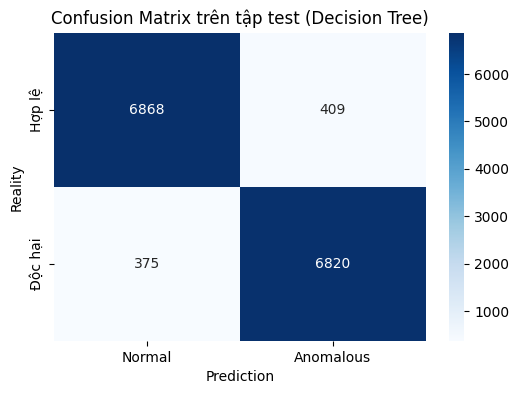

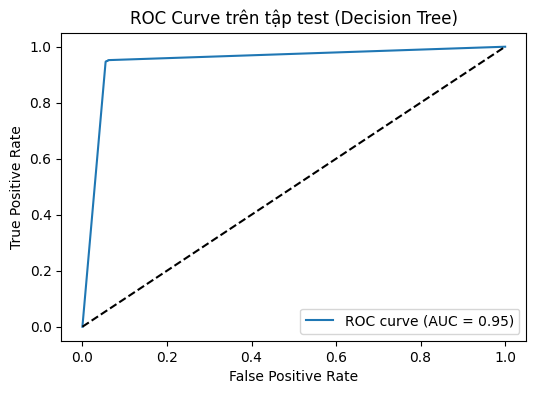

In [9]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
train_test_decision_tree()

In [10]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap('Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training time (s):317.81

Best hyperparameter : {'estimator__C': 10, 'estimator__max_iter': 1000, 'estimator__tol': 0.001}
Best recall on cross-validation: 0.9475567905867394
Prediction time (s):0.08
✅ Mô hình đã được lưu tại: linearsvc.pkl

Validation on Tập val:
Accuracy: 0.9475
Test Error (1-Accuracy): 0.0525
Precision: 0.9626
Recall: 0.9321
F1-Score: 0.9471
ROC-AUC: 0.9884
Log Loss: 0.1328

Validation on Tập test:
Accuracy: 0.9485
Test Error (1-Accuracy): 0.0515
Precision: 0.9563
Recall: 0.9393
F1-Score: 0.9477
ROC-AUC: 0.9892
Log Loss: 0.1284
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9475
Test Error (1-Accuracy): 0.0525
Precision: 0.9626
Recall: 0.9321
F1-Score: 0.9471
ROC-AUC: 0.9884
Log Loss: 0.1328

Validation on Test Set:
Accuracy: 0.9485
Test Error (1-Accuracy): 0.0515
Precision: 0.9563
Recall: 0.9393
F1-Score: 0.9477
ROC-AUC: 0.9892
Log Loss: 0.1284


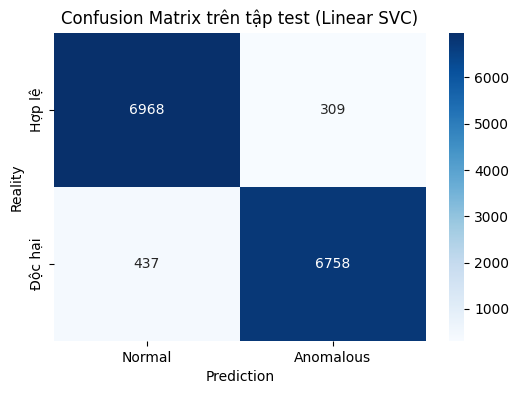

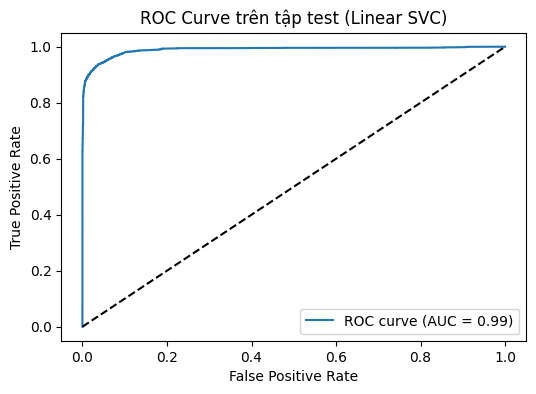

In [11]:
train_test_linear()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time (s):439.97

Best hyperparameter : {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best recall on cross-validation: 0.951609439427167
Prediction time (s):182.81
✅ Mô hình đã được lưu tại: knn.pkl

Validation on Tập val:
Accuracy: 0.9579
Test Error (1-Accuracy): 0.0421
Precision: 0.9549
Recall: 0.9618
F1-Score: 0.9584
ROC-AUC: 0.9849
Log Loss: 0.4851

Validation on Tập test:
Accuracy: 0.9558
Test Error (1-Accuracy): 0.0442
Precision: 0.9462
Recall: 0.9659
F1-Score: 0.9560
ROC-AUC: 0.9837
Log Loss: 0.5281
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9579
Test Error (1-Accuracy): 0.0421
Precision: 0.9549
Recall: 0.9618
F1-Score: 0.9584
ROC-AUC: 0.9849
Log Loss: 0.4851

Validation on Test Set:
Accuracy: 0.9558
Test Error (1-Accuracy): 0.0442
Precision: 0.9462
Recall: 0.9659
F1-Score: 0.9560
ROC-AUC: 0.9837
Log Loss: 0.5281


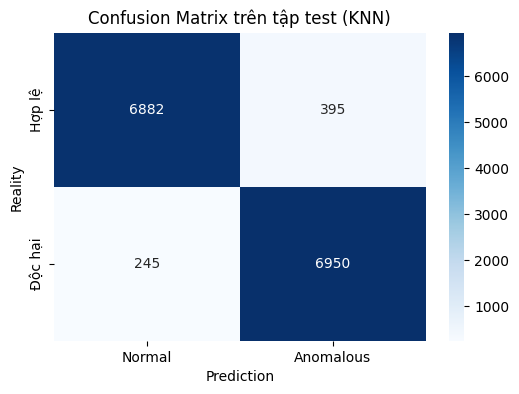

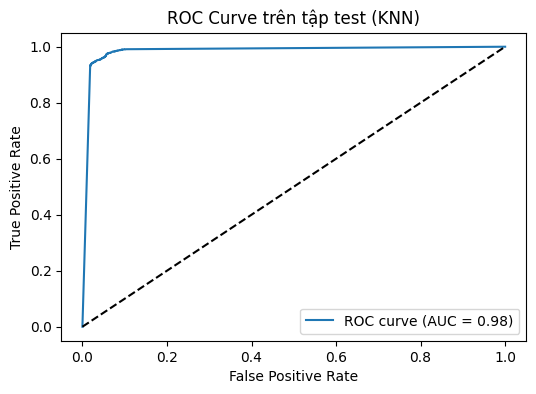

In [12]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training time (s):3.05

Best hyperparameter : {'var_smoothing': 1e-09}
Best recall on cross-validation: 0.7951534926422507
Prediction time (s):0.20
✅ Mô hình đã được lưu tại: naive_bayes_model.pkl

Validation on Tập val:
Accuracy: 0.8077
Test Error (1-Accuracy): 0.1923
Precision: 0.8560
Recall: 0.7432
F1-Score: 0.7956
ROC-AUC: 0.9092
Log Loss: 6.6805

Validation on Tập test:
Accuracy: 0.8042
Test Error (1-Accuracy): 0.1958
Precision: 0.8444
Recall: 0.7432
F1-Score: 0.7906
ROC-AUC: 0.9040
Log Loss: 6.7889
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.8077
Test Error (1-Accuracy): 0.1923
Precision: 0.8560
Recall: 0.7432
F1-Score: 0.7956
ROC-AUC: 0.9092
Log Loss: 6.6805

Validation on Test Set:
Accuracy: 0.8042
Test Error (1-Accuracy): 0.1958
Precision: 0.8444
Recall: 0.7432
F1-Score: 0.7906
ROC-AUC: 0.9040
Log Loss: 6.7889


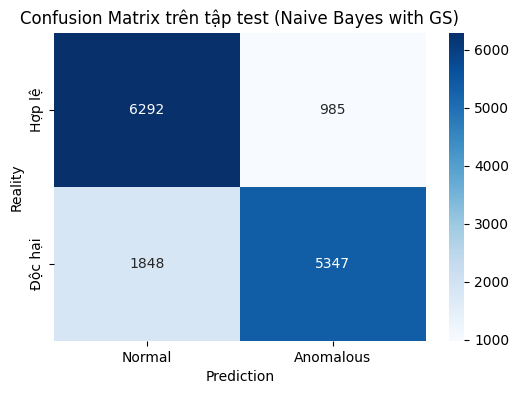

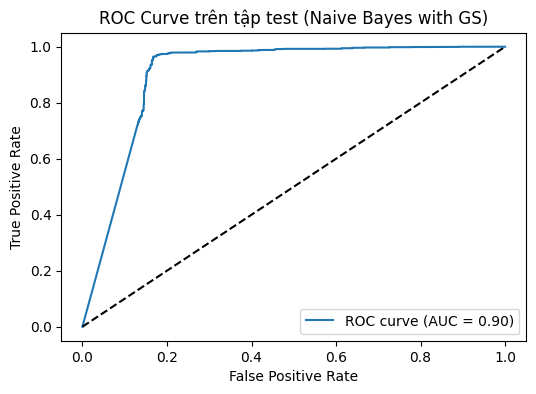

In [13]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 156.18

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best recall on cross-validation: 0.9923058130350286
Prediction time (s): 0.20
✅ Mô hình đã được lưu tại: random_forest_grids.pkl

Validation on Tập val:
Accuracy: 0.9451
Test Error (1-Accuracy): 0.0549
Precision: 0.9086
Recall: 0.9908
F1-Score: 0.9479
ROC-AUC: 0.9947
Log Loss: 0.1210

Validation on Tập test:
Accuracy: 0.9388
Test Error (1-Accuracy): 0.0612
Precision: 0.8965
Recall: 0.9912
F1-Score: 0.9415
ROC-AUC: 0.9941
Log Loss: 0.1255
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9451
Test Error (1-Accuracy): 0.0549
Precision: 0.9086
Recall: 0.9908
F1-Score: 0.9479
ROC-AUC: 0.9947
Log Loss: 0.1210

Validation on Test Set:
Accuracy: 0.9388
Test Error (1-Accuracy): 0.0612
Precision: 0.8965
Recall: 0.9912
F1-Score: 0.9415
ROC-AUC: 0.9941
Log Loss: 0.1255


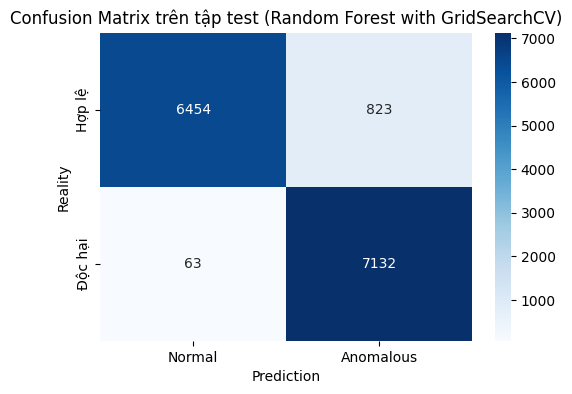

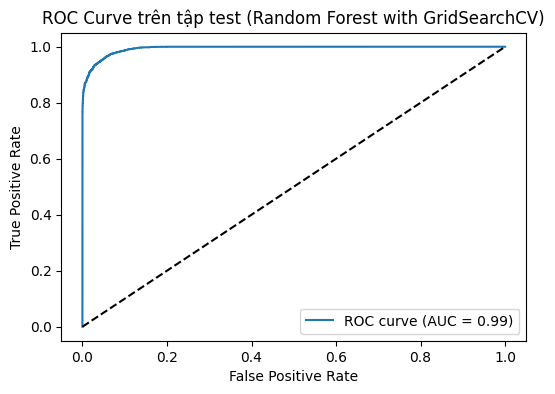

In [14]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap('Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time (s):86.67

Best hyperparameter : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best recall on cross-validation: 0.9648982232947526
Prediction time (s):0.30
✅ Mô hình đã được lưu tại: xgboost.pkl

Validation on Tập val:
Accuracy: 0.9665
Test Error (1-Accuracy): 0.0335
Precision: 0.9579
Recall: 0.9763
F1-Score: 0.9670
ROC-AUC: 0.9972
Log Loss: 0.0679

Validation on Tập test:
Accuracy: 0.9646
Test Error (1-Accuracy): 0.0354
Precision: 0.9533
Recall: 0.9767
F1-Score: 0.9648
ROC-AUC: 0.9969
Log Loss: 0.0725
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9665
Test Error (1-Accuracy): 0.0335
Precision: 0.9579
Recall: 0.9763
F1-Score: 0.9670
ROC-AUC: 0.9972
Log Loss: 0.0679

Validation on Test Set:
Accuracy: 0.9646
Test Error (1-Accuracy): 0.0354
Precision: 0.9533
Recall: 0.9767
F1-Score: 0.9648
ROC-AUC: 0.9969
Log Loss: 0.0725


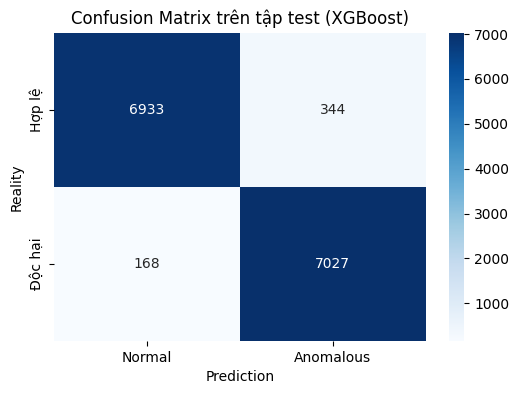

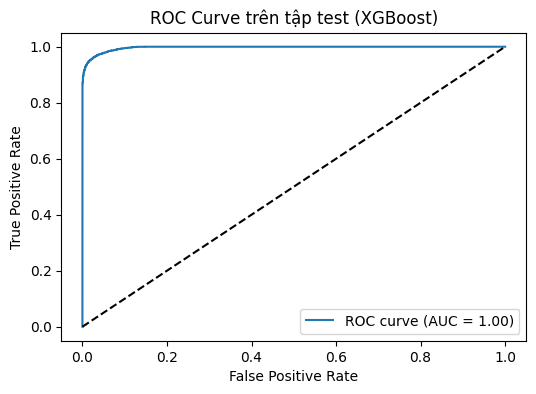

In [16]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap('XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()

   Train Type   Dataset  Accuracy  Test Error  Precision    Recall  F1-Score  \
0          ML   Tập val  0.943322    0.056678   0.944243  0.943191  0.943717   
1          ML  Tập test  0.944168    0.055832   0.942865  0.944962  0.943912   
2          ML   Tập val  0.945567    0.054433   0.962728  0.927875  0.944980   
3          ML  Tập test  0.947485    0.052515   0.954000  0.939680  0.946786   
4          ML   Tập val  0.957632    0.042368   0.955666  0.960457  0.958056   
5          ML  Tập test  0.956122    0.043878   0.946623  0.966227  0.956324   
6          ML   Tập val  0.808361    0.191639   0.855772  0.745196  0.796666   
7          ML  Tập test  0.804519    0.195481   0.844757  0.743433  0.790863   
8          ML   Tập val  0.947391    0.052609   0.911885  0.991367  0.949967   
9          ML  Tập test  0.940437    0.059563   0.898954  0.991661  0.943035   
10         ML   Tập val  0.967733    0.032267   0.961043  0.975494  0.968214   
11         ML  Tập test  0.964898    0.0

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\397119161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')


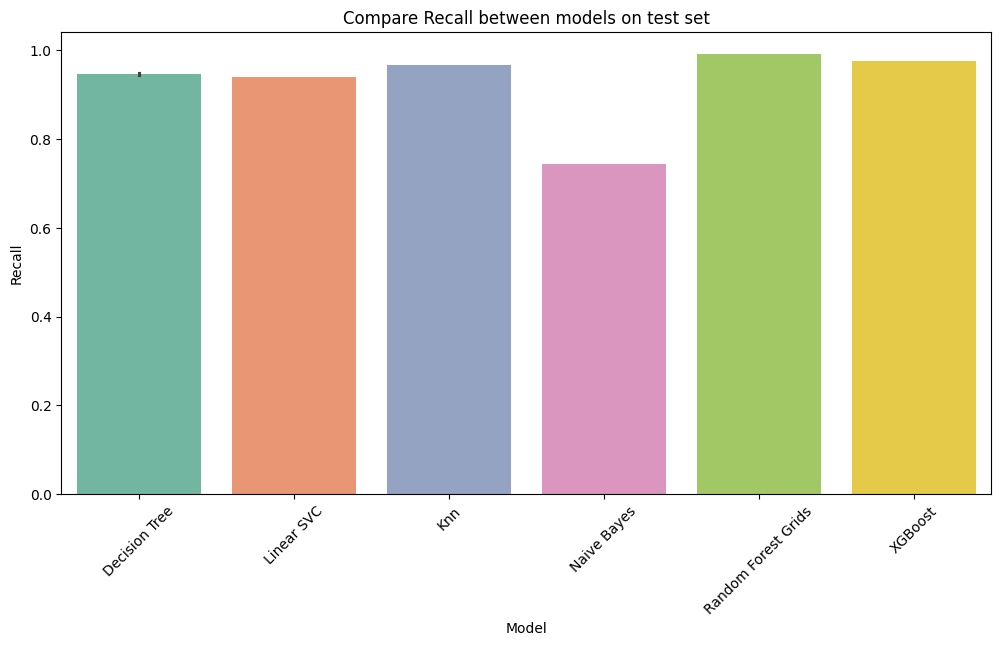

In [17]:
results_df = pd.read_csv('model_results.csv')
print(results_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')
plt.title('Compare Recall between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\116253463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')


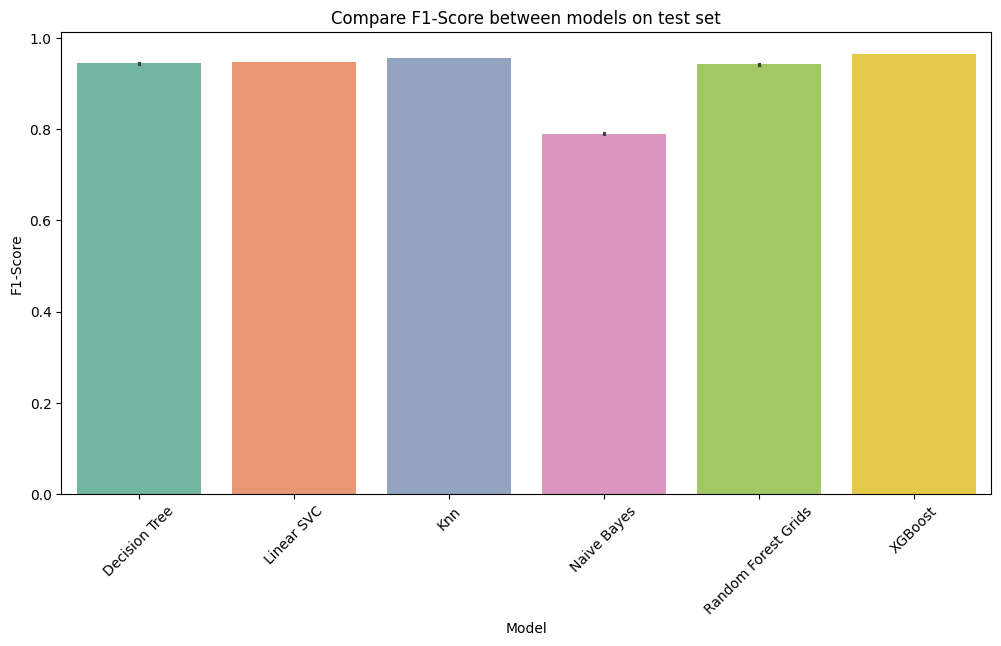

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')
plt.title('Compare F1-Score between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\2461358494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Accuracy', palette='Set2')


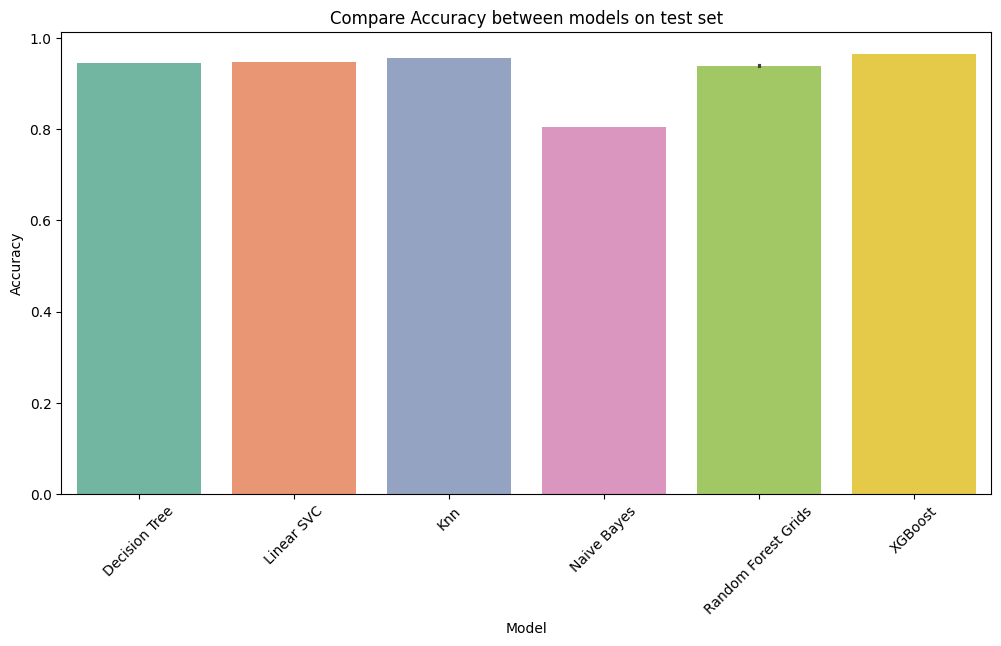

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Accuracy', palette='Set2')
plt.title('Compare Accuracy between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\3544165060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Test Error', palette='Set2')


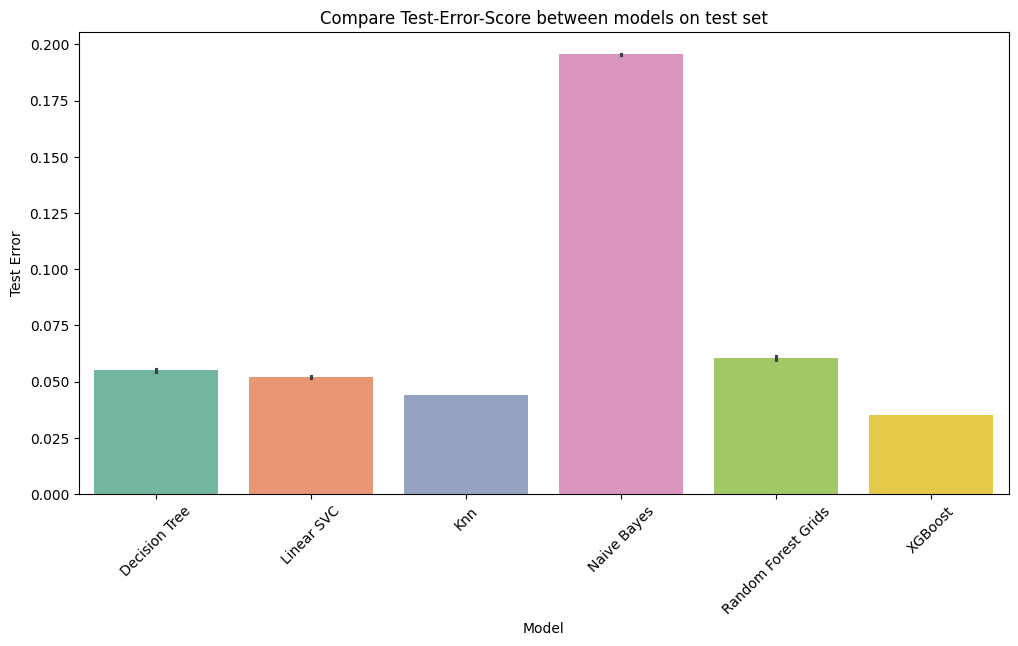

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Test Error', palette='Set2')
plt.title('Compare Test-Error-Score between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\745746219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Precision', palette='Set2')


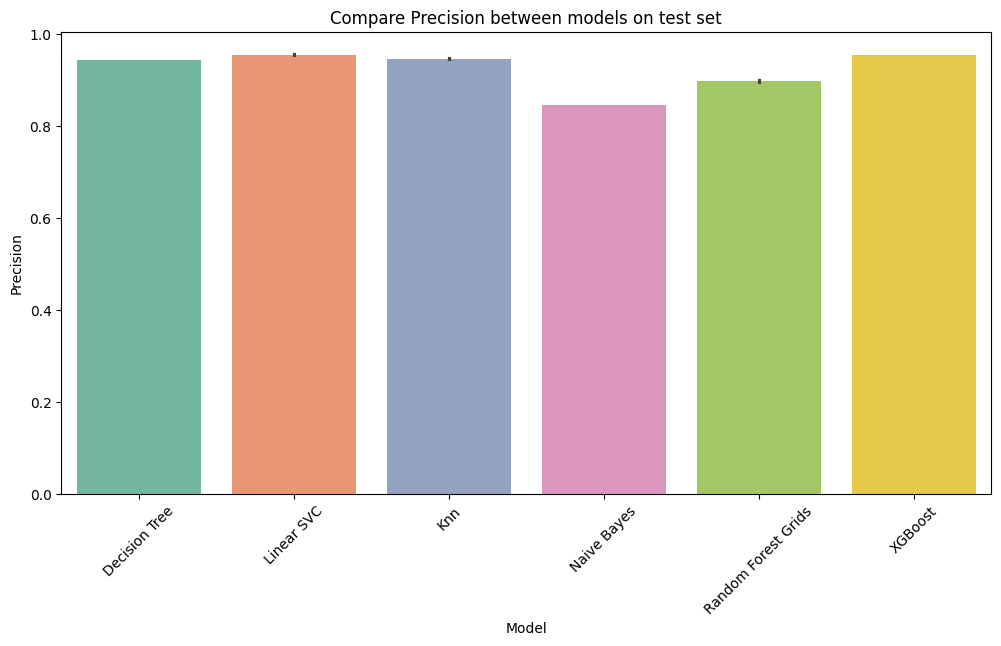

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Precision', palette='Set2')
plt.title('Compare Precision between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_36916\2976826990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Log Loss', palette='Set2')


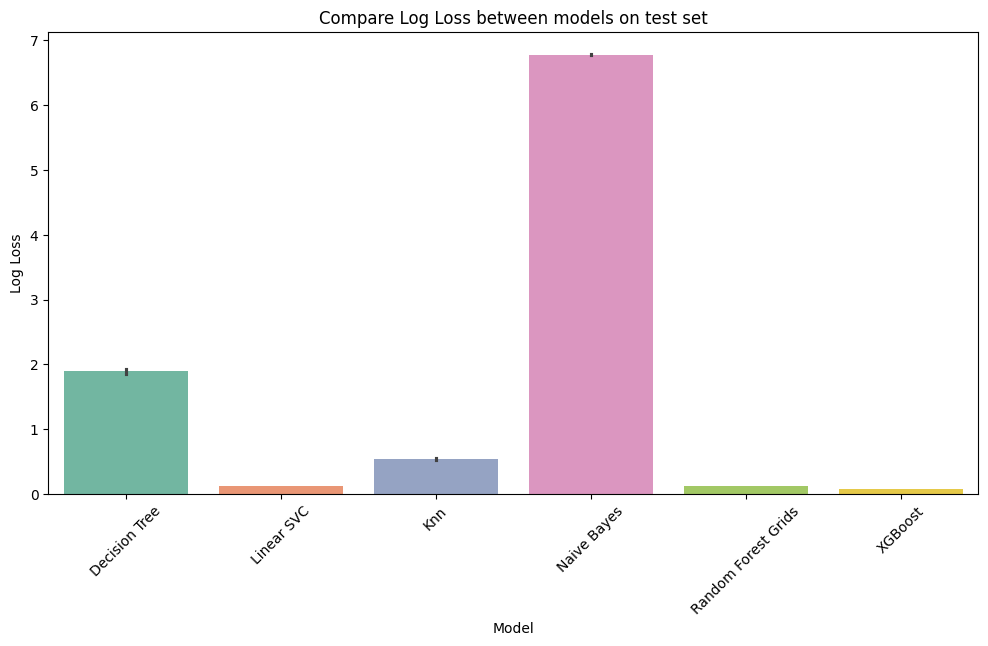

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Log Loss', palette='Set2')
plt.title('Compare Log Loss between models on test set')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# All values
test_df = results_df[results_df['Dataset'] == 'Tập test'][[
    'Model', 'Accuracy', 'Test Error', 'Precision', 'Recall',
    'F1-Score', 'ROC-AUC', 'Log Loss', 'Training Time', 'Prediction Time'
]]

# Table
print("\n Compare all values:")
display(test_df) 


 Compare all values:


,Model,Accuracy,Test Error,Precision,Recall,F1-Score,ROC-AUC,Log Loss,Training Time,Prediction Time
1,Decision Tree,0.944168,0.055832,0.942865,0.944962,0.943912,0.946197,1.931973,190.178876,0.048211
3,Linear SVC,0.947485,0.052515,0.954000,0.939680,0.946786,0.988399,0.130789,283.429769,0.081318
5,Knn,0.956122,0.043878,0.946623,0.966227,0.956324,0.982995,0.556387,417.189384,27.733963
7,Naive Bayes,0.804519,0.195481,0.844757,0.743433,0.790863,0.904550,6.770273,2.104696,0.171839
9,Random Forest Grids,0.940437,0.059563,0.898954,0.991661,0.943035,0.994094,0.125217,112.758251,0.198993
11,XGBoost,0.964898,0.035102,0.953602,0.976928,0.965124,0.996758,0.074588,80.719448,0.161535


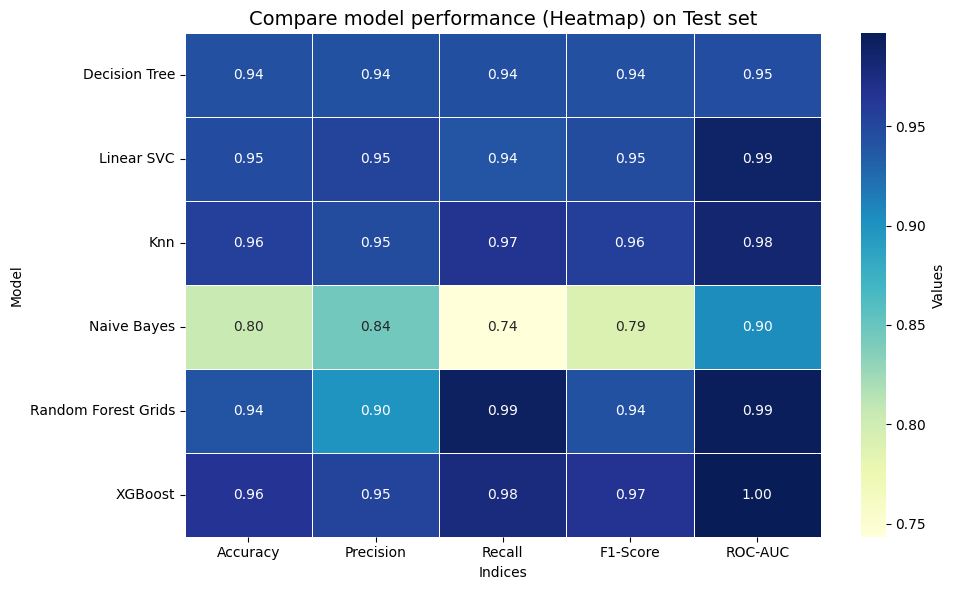

In [ ]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
heatmap_data = test_df.set_index('Model')[metrics]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Compare model performance (Heatmap) on Test set', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

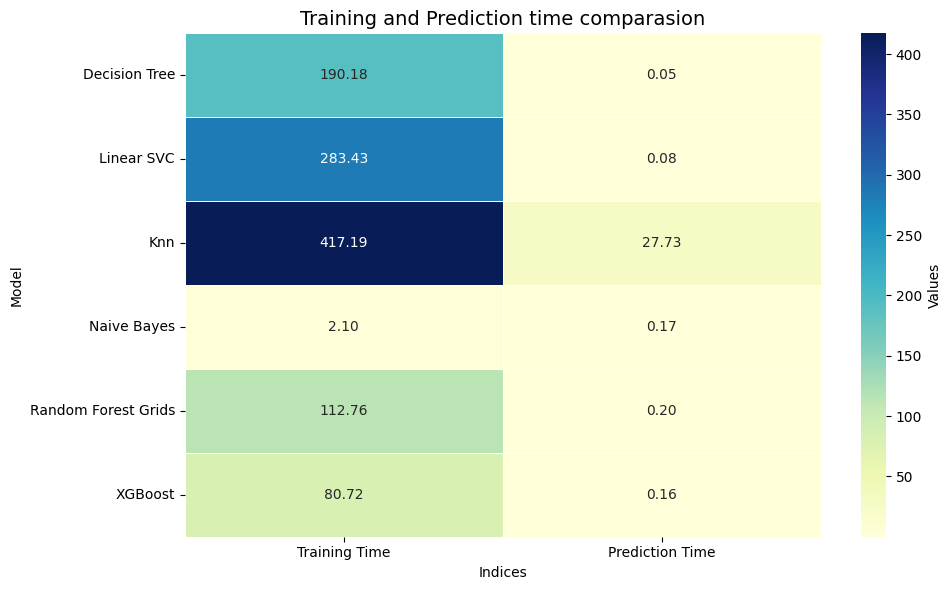

In [ ]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Training Time', 'Prediction Time']
heatmap_data = test_df.set_index('Model')[metrics]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Training and Prediction time comparasion', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

In [ ]:
import shutil
import os

def delete_pycache(start_path='.'):
    for root, dirs, files in os.walk(start_path):
        for d in dirs:
            if d == '__pycache__':
                full_path = os.path.join(root, d)
                try:
                    shutil.rmtree(full_path)
                    print(f"Deleted: {full_path}")
                except Exception as e:
                    print(f"Error deleting {full_path}: {e}")

# Gọi hàm
delete_pycache()

Deleted: .\config_module\__pycache__
Deleted: .\data\__pycache__
Deleted: .\models\__pycache__
Deleted: .\preprocessing\__pycache__
